# Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid')

# Data Loading

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Chandu1613/Wine-Quality/refs/heads/main/QualityPrediction.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.isnull().sum().sum()

0

In [5]:
col = df.columns

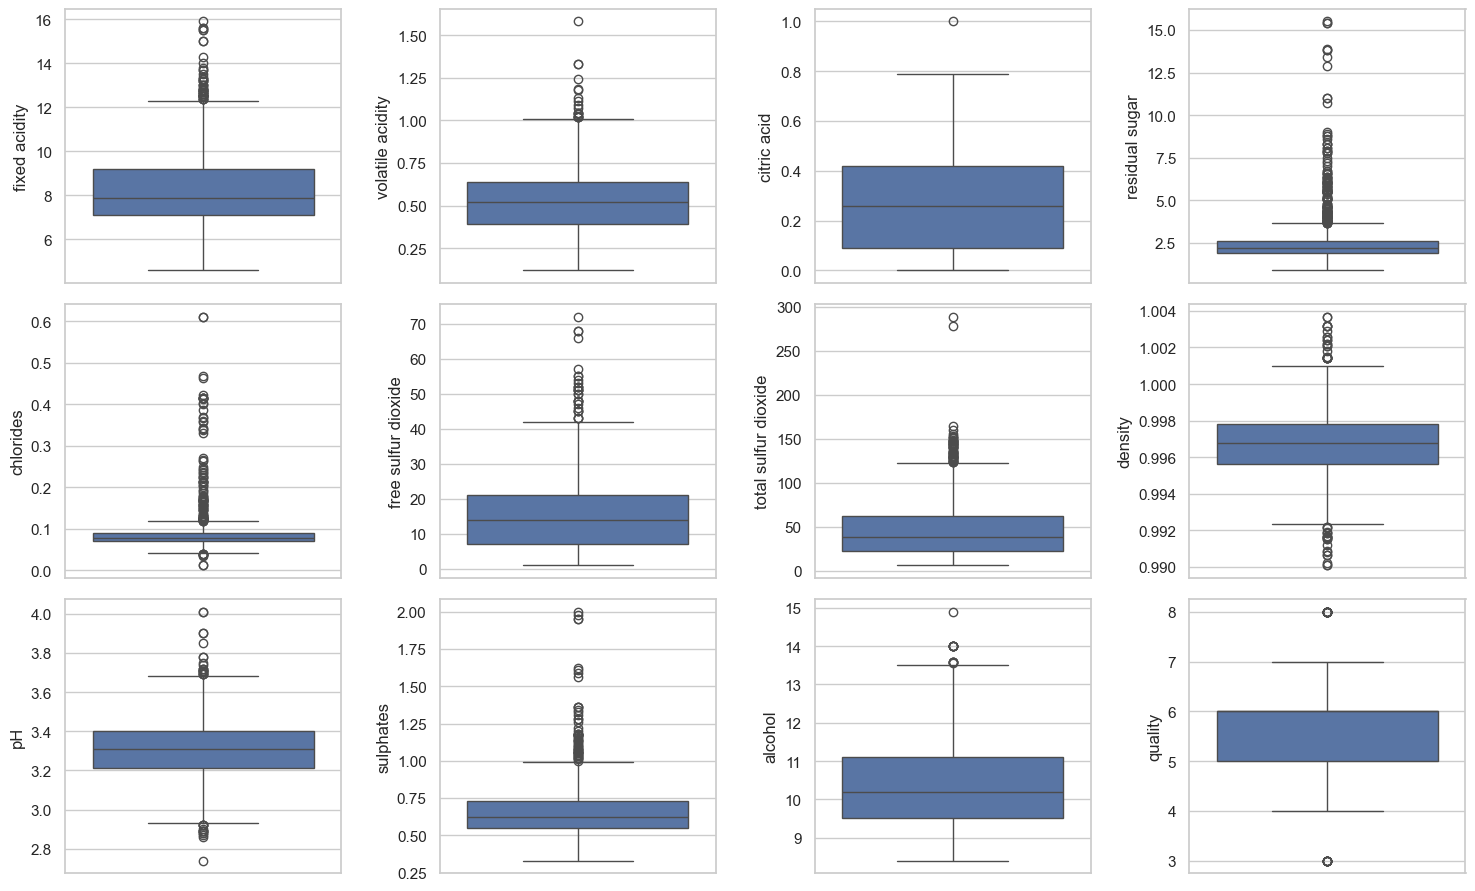

In [6]:
f,a=plt.subplots(3,4,figsize=(15,9),dpi=100)
ind=0

for i in range(3):
    for j in range(4):
        sns.boxplot(y=df[col[ind]],ax=a[i,j])
        ind+=1
plt.tight_layout()
plt.show()

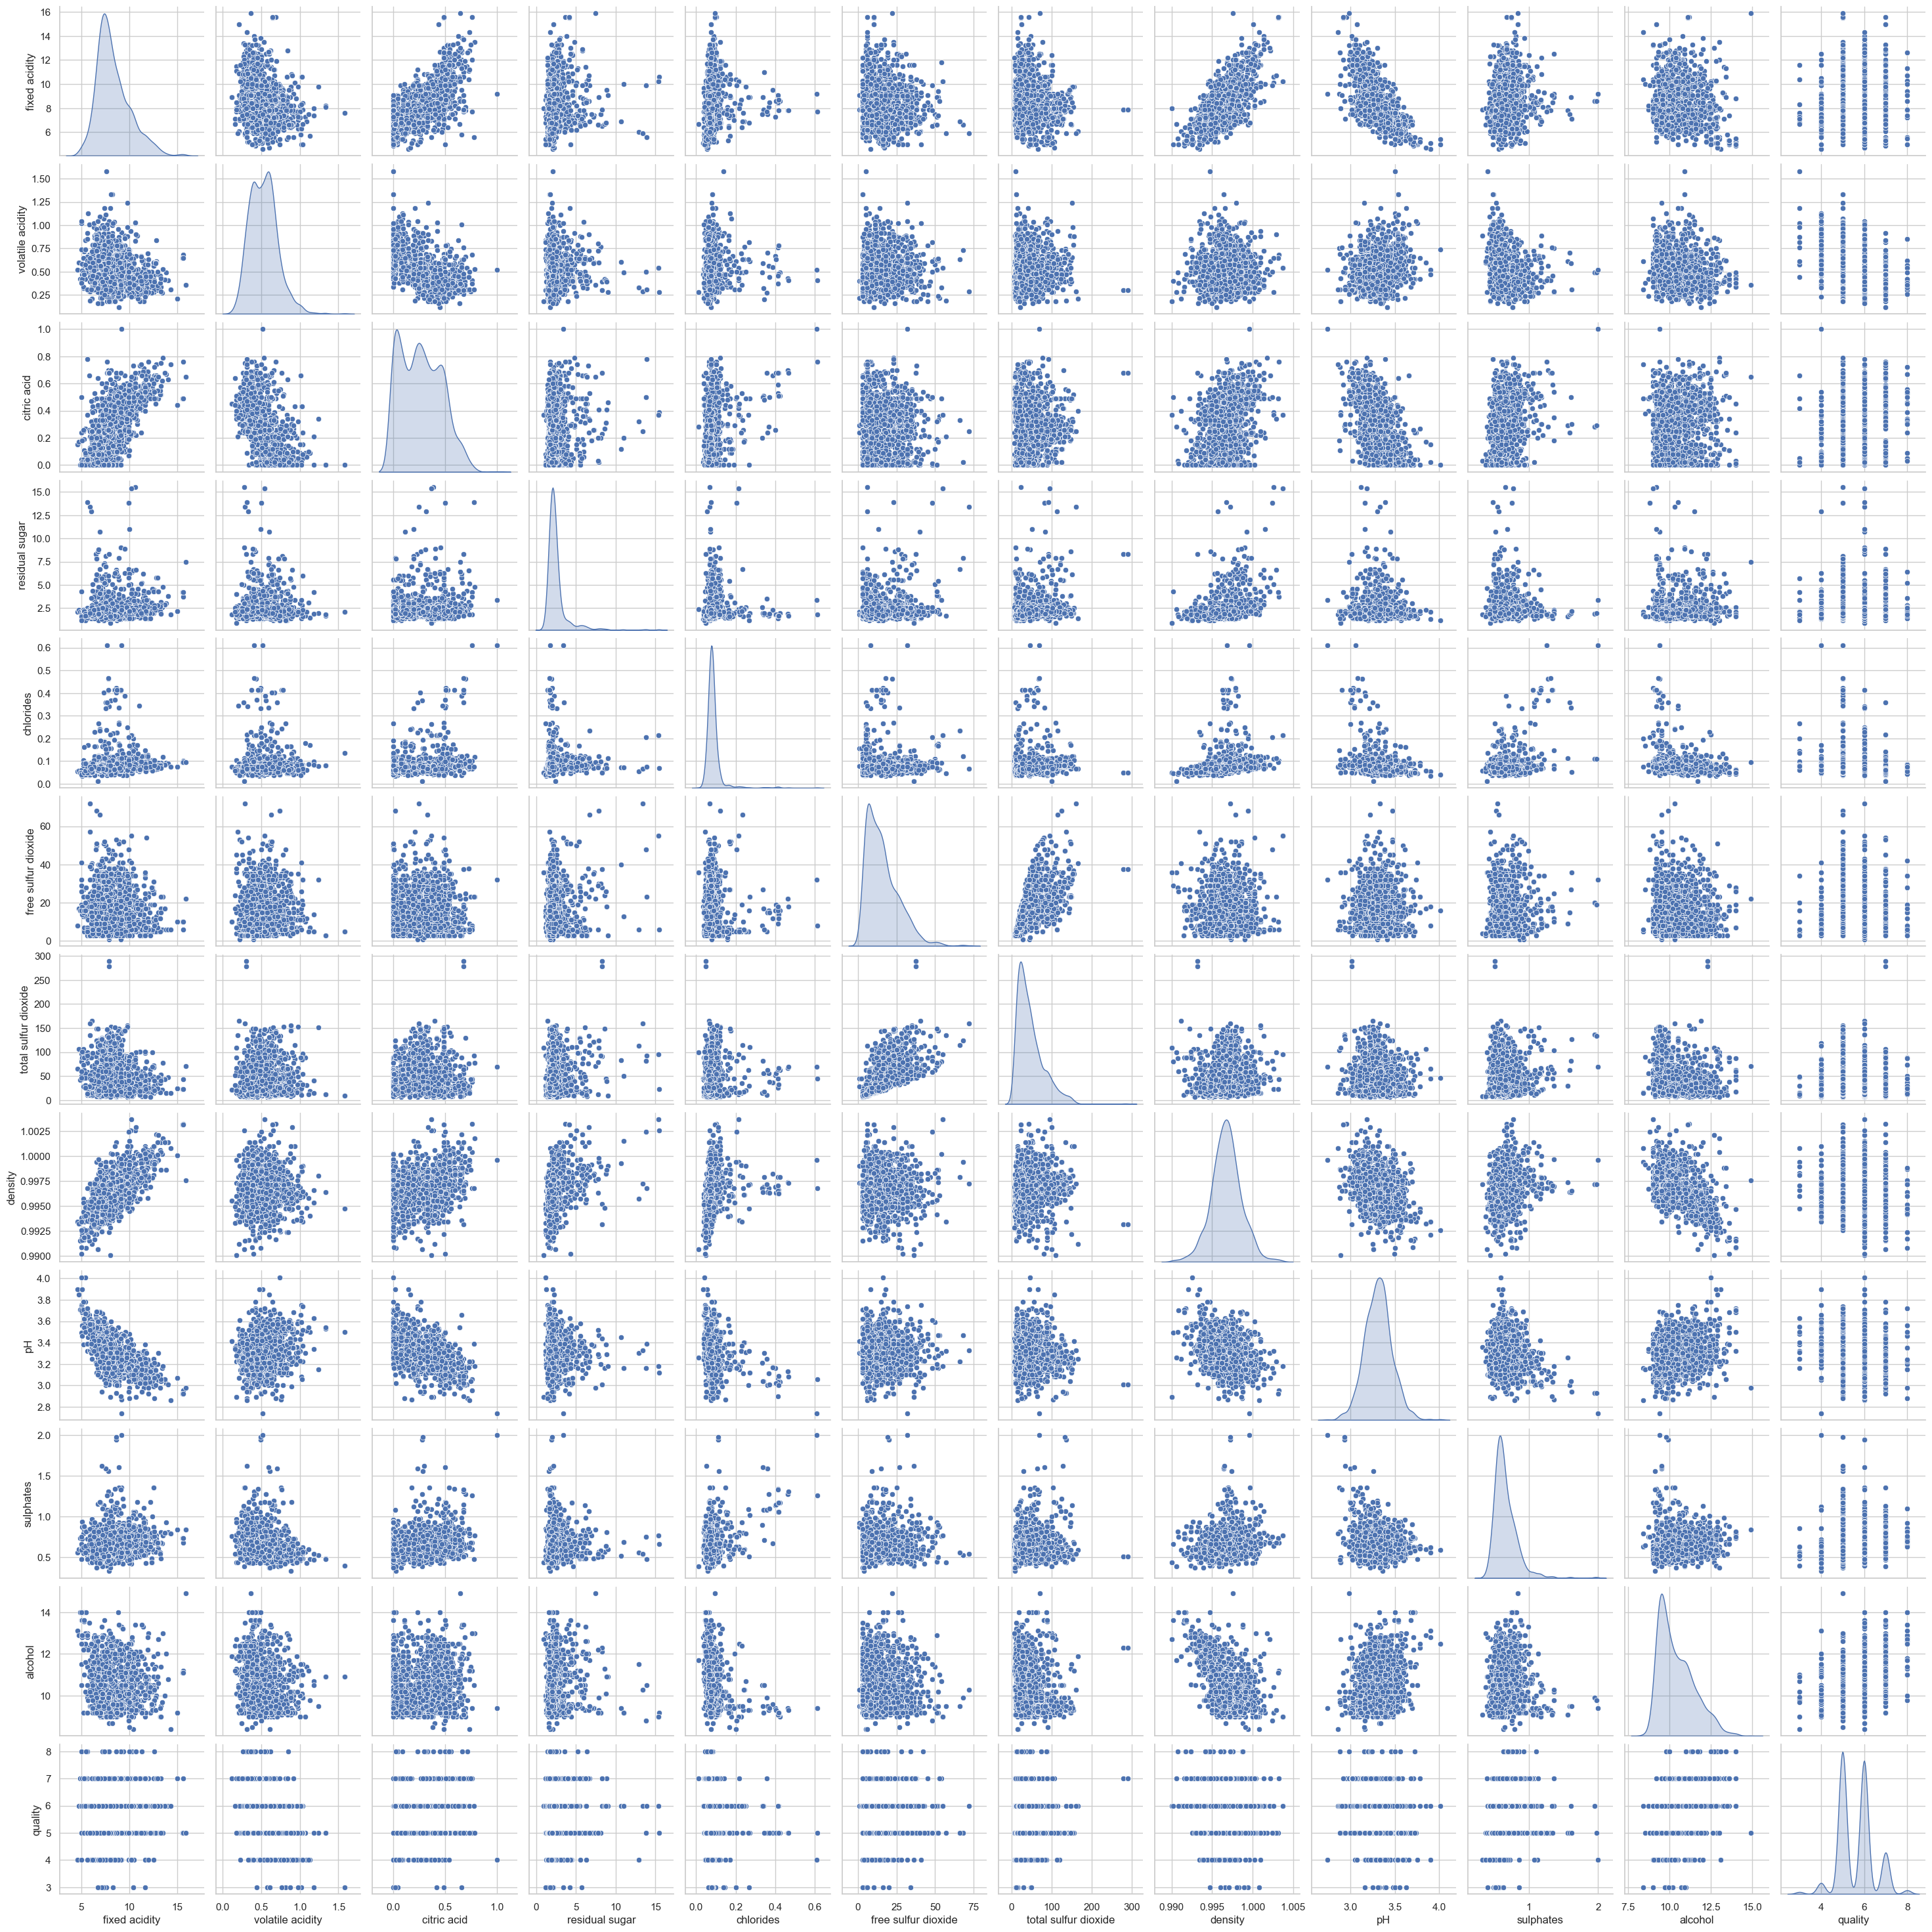

In [7]:
sns.pairplot(df, diag_kind="kde")
plt.show()

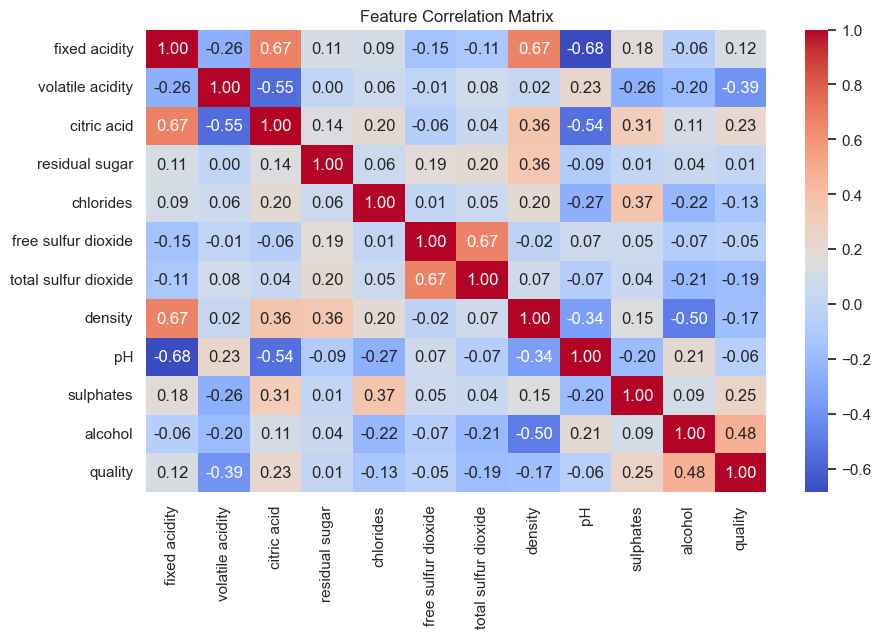

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV

X = df.drop(columns=['quality'])
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [16]:
def train_evaluate_model(model, param_grid, name):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    metrics = {
        "Model": name,
        "R² Score": r2_score(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "MAE": mean_absolute_error(y_test, y_pred),
        "Best Params": grid_search.best_params_
    }
    
    return best_model, metrics

In [ ]:
models = {
    "Ridge": (Ridge(), {'alpha': [0.01, 0.1, 1, 10, 100]}),
    "Lasso": (Lasso(), {'alpha': [0.01, 0.1, 1, 10, 100]}),
    "Decision Tree": (DecisionTreeRegressor(), {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]}),
    "Random Forest": (RandomForestRegressor(), {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}),
    "Gradient Boosting": (GradientBoostingRegressor(), {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}),
    "XGBoost": (XGBRegressor(), {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]})
}

In [22]:
results = []
best_model = None
best_r2 = float('-inf')

for name, (model, param_grid) in models.items():
    print(f"Training {name}...")
    trained_model, metrics = train_evaluate_model(model, param_grid, name)
    results.append(metrics)

    if metrics["R² Score"] > best_r2:
        best_r2 = metrics["R² Score"]
        best_model = trained_model

results_df = pd.DataFrame(results).sort_values(by="R² Score", ascending=False)
print("\n📊 Model Performance Comparison:")
print(results_df)

print("\n🏆 Best Model:", results_df.iloc[0]["Model"])
print("📌 Best Hyperparameters:", results_df.iloc[0]["Best Params"])


Training Ridge...
Training Lasso...
Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...
Training XGBoost...

📊 Model Performance Comparison:
               Model  R² Score       MSE      RMSE       MAE  \
3      Random Forest  0.536395  0.302968  0.550426  0.420379   
5            XGBoost  0.475823  0.342553  0.585280  0.448083   
4  Gradient Boosting  0.435242  0.369073  0.607514  0.495449   
0              Ridge  0.398706  0.392949  0.626856  0.505788   
1              Lasso  0.362003  0.416934  0.645705  0.520873   
2      Decision Tree  0.288160  0.465192  0.682050  0.540976   

                                         Best Params  
3  {'max_depth': 20, 'min_samples_leaf': 1, 'min_...  
5        {'learning_rate': 0.1, 'n_estimators': 100}  
4         {'learning_rate': 0.1, 'n_estimators': 50}  
0                                       {'alpha': 1}  
1                                    {'alpha': 0.01}  
2           {'max_depth': 3, 'min_samples_split': 

In [32]:
rf = RandomForestRegressor(max_depth=None,n_estimators=100)
rf

RandomForestRegressor()

In [33]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [34]:
y_pred = rf.predict(X_test)

In [35]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [36]:
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 0.3162
Root Mean Squared Error: 0.5623
R² Score: 0.5161


In [37]:
import joblib

joblib.dump(rf, "random_forest_model.joblib")
print("Model saved successfully!")

Model saved successfully!


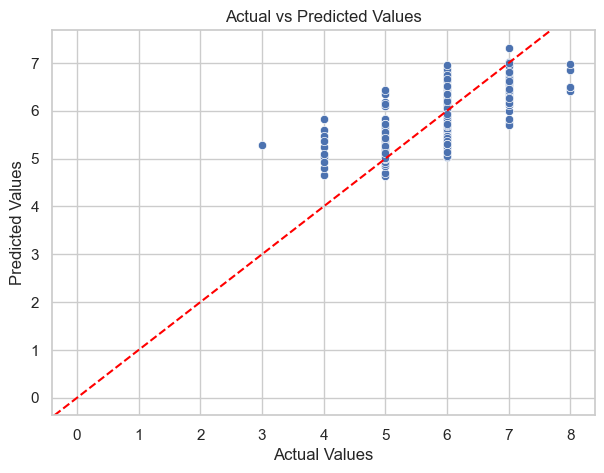

In [38]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.axline((0, 0), slope=1, color="red", linestyle="--")
plt.show()